**Lecture 4**

**Building an Image Classifier**

**Importing Python libraries E.g. Scikit-learn, Scikit-learn’s dataset, Numpy, Matplotlib**

**Organizing data into sets into Train-Val-Test**

**Dr Tasweer!Ahmad**

**Classfication in ML**



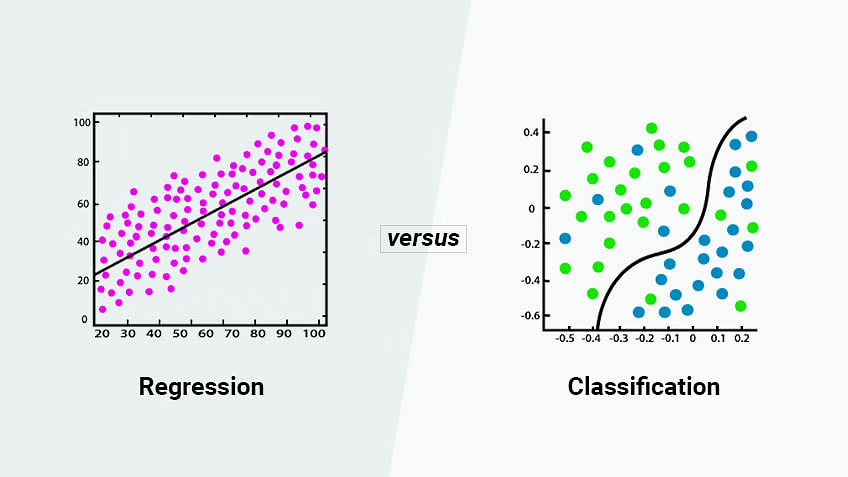

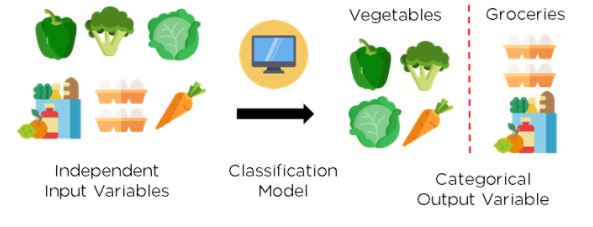

Ref: https://www.simplilearn.com/regression-vs-classification-in-machine-learning-article

In [1]:
#importing important libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils
#from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In this example, we will be using the famous **CIFAR-10 dataset**. **CIFAR-10** is a large image dataset containing over 60,000 images representing **10 different classes** of objects like cats, planes, and cars.

The images are full-color RGB, but they are **fairly small, only 32 x 32**. One great thing about the CIFAR-10 dataset is that it comes **prepackaged with Keras**, so it is very easy to load up the dataset and the images need very little preprocessing.


In [2]:
# loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print('Size of train data {}'.format(X_train.shape))
print('Size of test data {}'.format(X_test.shape))

Size of train data (50000, 32, 32, 3)
Size of test data (10000, 32, 32, 3)


We have 50K train images and 10K test images. Each image is fairly small of size 32 X 32. Being RGB, image has 3 dimenstions.

In [4]:
print('Size of train class {}'.format(y_train.shape))
print('Size of test class {}'.format(y_test.shape))

Size of train class (50000, 1)
Size of test class (10000, 1)


We defined class name here for all 10 classes. We also need to specify the number of classes that are in the dataset, so we know how many neurons to compress the final layer down to.

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))

In [6]:
print('Total class {}'.format(num_classes))

Total class 10


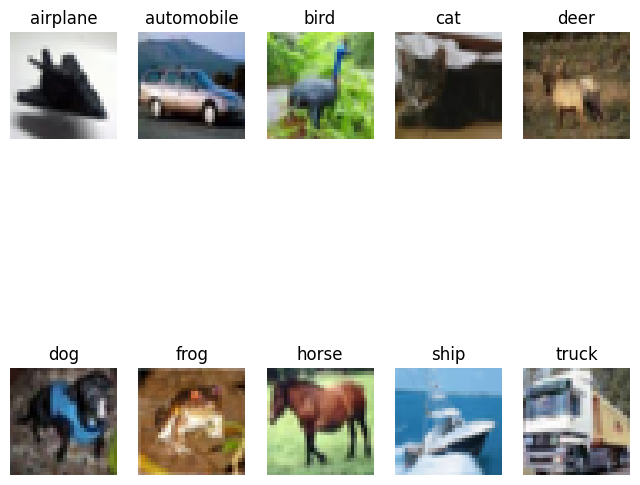

In [7]:
#We plot 10 images represent each class from train data
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    ax = plt.subplot(2, 5, i + 1)
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    plt.imshow(features_idx[0])
    ax.set_title(class_names[i])
    plt.axis("off")


**Images are too small so they are displayed in distorted way.**



In most cases, **you will need to do some preprocessing** of your data to get it ready for use, but since we are using a prepackaged dataset, very little preprocessing needs to be done. One thing we want to do is normalize the input data.

The pixel values varie in the range 0 to 255.

**So in order to normalize** the data we can simply divide the image values by 255. To do this, we first need to make the data a float type, since they are currently integers. We can do this by using the astype() Numpy command and then declaring what data type we want.

In [8]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

**Create the model**

In [10]:
model = Sequential([
  layers.Conv2D(32, (3,3),input_shape=X_train.shape[1:], padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='sigmoid')
])

**Compile the model**

To view training and validation accuracy for each training epoch, pass the metrics argument.

In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [12]:
#model.summary()

**Train the model**

In [13]:
seed = 21
np.random.seed(seed)
epochs=100
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size= batch_size)

Epoch 1/100
1563/1563 [==============================] - 15s 6ms/step - loss: 0.2306 - accuracy: 0.4606 - val_loss: 0.1793 - val_accuracy: 0.6083
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1710 - accuracy: 0.6256 - val_loss: 0.1517 - val_accuracy: 0.6779
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1466 - accuracy: 0.6878 - val_loss: 0.1408 - val_accuracy: 0.7013
Epoch 4/100
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1315 - accuracy: 0.7243 - val_loss: 0.1276 - val_accuracy: 0.7305
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1208 - accuracy: 0.7514 - val_loss: 0.1279 - val_accuracy: 0.7311
Epoch 6/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1112 - accuracy: 0.7751 - val_loss: 0.1201 - val_accuracy: 0.7540
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1036 - accuracy: 0.7904 - val_loss: 0.1202 - val_a

visualize the results

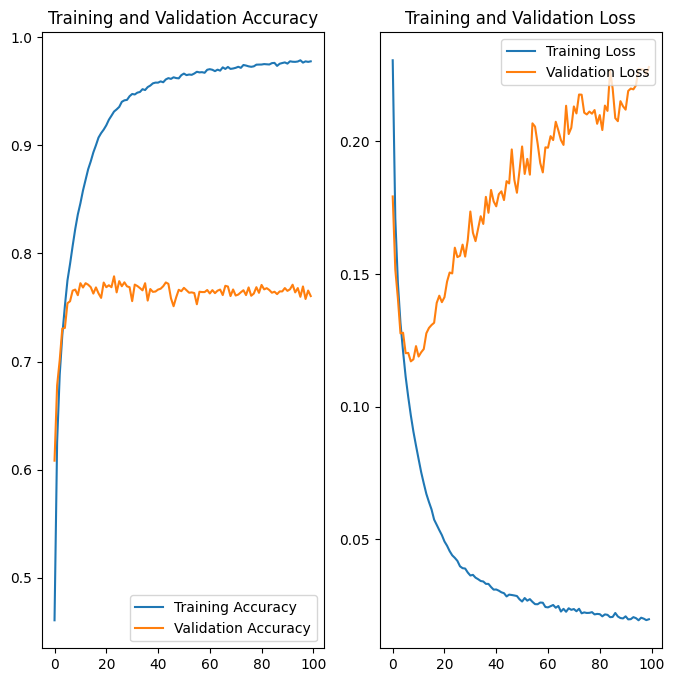

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict on new data

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.

1/1 [==============================] - 0s 490ms/step
This image most likely belongs to horse with a 23.20 percent confidence.
Image after resizing to 32x32
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to dog with a 23.20 percent confidence.
Image after resizing to 32x32
1/1 [==============================] - 0s 16ms/step
This image most likely belongs to airplane with a 23.20 percent confidence.
Image after resizing to 32x32
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to ship with a 23.20 percent confidence.
Image after resizing to 32x32
1/1 [==============================] - 0s 17ms/step
This image most likely belongs to deer with a 23.20 percent confidence.
Image after resizing to 32x32


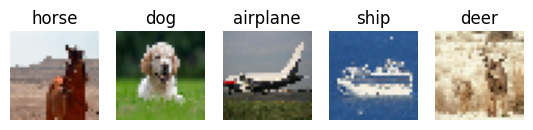

In [15]:
#url_dict.clear()
url_dict = {'Horse':'https://scx2.b-cdn.net/gfx/news/2020/1-geneticstudy.jpg',
            #'Car':'https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit.jpg',
            'dog': 'https://i.insider.com/5df126b679d7570ad2044f3e?width=1800&format=jpeg&auto=webp',
            'plane': 'https://www.netpaths.net/wp-content/uploads/google-airplane1.jpg',
            'ship' : 'https://upload.wikimedia.org/wikipedia/commons/2/22/Diamond_Princess_%28ship%2C_2004%29_-_cropped.jpg',
            'deer' : 'https://wdfw.wa.gov/sites/default/files/styles/page_body_half_width/public/2019-03/deer_0.jpg?itok=8tNvAOx7',
            #'deer' : 'https://georgiarecorder.com/wp-content/uploads/2023/07/MCNC-Six-point-buck-and-growing-DSC_2672-1.jpg'
}
i =0
plt.figure(figsize=(8, 8))
for key, value in url_dict.items():
  url = value
  i +=1
  path = tf.keras.utils.get_file(key, origin=url)
  img = keras.preprocessing.image.load_img(
    path, target_size=(32, 32))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score)))
  print('Image after resizing to 32x32')
  ax = plt.subplot(1, 6, i + 1)
  plt.imshow(img)
  ax.set_title(class_names[np.argmax(score)])
  plt.axis("off")


